# Predict stock value using Yahoo yfinance

In [2]:
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
from datetime import date

In [3]:
# Some stock names
# AAPL = Apple Inc
# MSFT = Microsoft Corporation
# AMZN = Amazon.com Incomplete
# GOOG = Alphabet Inc (Google)
# META = Meta Platforms Inc (Facebook)
# TSLA = Tesla Inc
# NVDA = NVIDIA Corporation
# NFLX = Netflix Inc

# define stock company and dates
Stock_comp = 'NVDA'
Start_date = '2021-01-01'
End_date = '2025-11-21'
# download stock data
data = yf.download(Stock_comp, start= Start_date, end= End_date)
data

C:\Users\daank\AppData\Local\Temp\ipykernel_23360\316511148.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Stock_comp, start= Start_date, end= End_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2021-01-04,13.077454,13.614973,12.926869,13.068229,560640000
2021-01-05,13.367900,13.406543,13.051023,13.063738,322760000
2021-01-06,12.579826,13.208593,12.551405,13.186155,580424000
2021-01-07,13.307319,13.340976,12.851077,12.931854,461480000
2021-01-08,13.240255,13.384109,13.006151,13.325770,292528000
...,...,...,...,...,...
2025-11-14,190.169998,191.009995,180.580002,182.860001,186591900
2025-11-17,186.600006,189.000000,184.320007,185.970001,173628900


In [4]:
# This is your basic data input to perform prediction
columns_to_drop = ['Open', 'High', 'Low']
df_input = data.drop(columns=columns_to_drop)
df_input = df_input[['Volume', 'Close']]
df_input

Price,Volume,Close
Ticker,NVDA,NVDA
Date,,
2021-01-04,560640000,13.077454
2021-01-05,322760000,13.367900
2021-01-06,580424000,12.579826
2021-01-07,461480000,13.307319
2021-01-08,292528000,13.240255
...,...,...
2025-11-14,186591900,190.169998
2025-11-17,173628900,186.600006


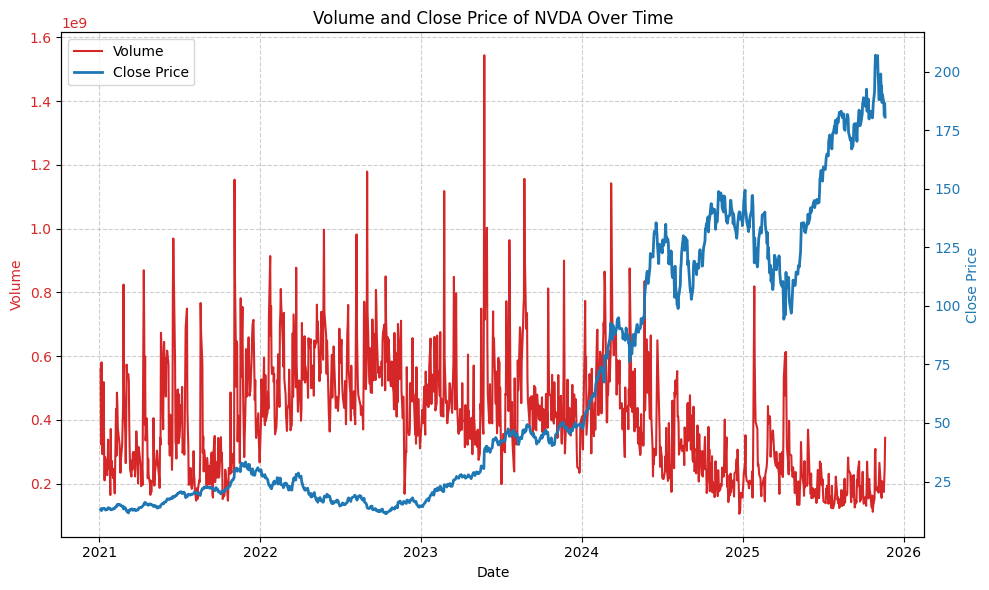

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot VOLUME on the LEFT y-axis
ax1.plot(df_input.index, df_input['Volume'], color='tab:red', label='Volume', linewidth=1.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot CLOSE PRICE on the RIGHT y-axis
ax2 = ax1.twinx()
ax2.plot(df_input.index, df_input['Close'], color='tab:blue', label='Close Price', linewidth=2)
ax2.set_ylabel('Close Price', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title
plt.title(f'Volume and Close Price of {Stock_comp} Over Time')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

Based on the **df_input** data (volume and closing price for every day, indexed by the date) you are going to **predict the closing stock value for the next day, based on the volume and closing stock values of the last 5 days**.

From here you should prepare your data and turn it into a time-series problem. Set the closing price of the next day (t+1) as target (label) for this day (t).

Next to the volume and closing price of today (t), also include the volume and closing prices of the last 4 days as features of your data (t-1)(t-2)(t-3)(t-4).

Use the Pandas shift function to apply it to the volume and closing price column to add a new target column as well as the feature columns.

Are there any other or better (lagged) features, given daily volume and closing price, that might help to do the prediction? How could you tell?

**You have to make a data model and then evaluate the model with a suitable metric. For the datamodel, try different (lagged) features, try different suitable algorithms and pick the best performing algorithm. Visualize the prediction.**

In [6]:
# Start here
# print the feature names
df_input.columns

MultiIndex([('Volume', 'NVDA'),
            ( 'Close', 'NVDA')],
           names=['Price', 'Ticker'])

In [11]:
# Make a new dataframe from the last 5 days
df_features = df_input.copy()

df_features = df_features.reset_index()
df_features = df_features.reset_index()
df_features = df_features.reset_index()

for i in range(1, 6):
    df_features[f'Volume_t-{i}'] = df_features['Volume'].shift(i)
    df_features[f'Close_t-{i}'] = df_features['Close'].shift(i)

# Set the target variable as the closing price of the next day
df_features['Close_t+1'] = df_features['Close'].shift(-1)

# Drop rows with NaN values
df_features = df_features.dropna()

# print(df_features.columns)

# copy only these features to a new dataframe
df_features = df_features[['Volume_t-1', 'Close_t-1', 'Volume_t-2', 'Close_t-2', 'Volume_t-3', 'Close_t-3', 'Volume_t-4', 'Close_t-4', 'Volume_t-5', 'Close_t-5', 'Close', 'Volume', 'Close_t+1']]

# Show the new dataframe
df_features

Price,Volume_t-1,Close_t-1,Volume_t-2,Close_t-2,Volume_t-3,Close_t-3,Volume_t-4,Close_t-4,Volume_t-5,Close_t-5,Close,Volume,Close_t+1
Ticker,,,,,,,,,,,NVDA,NVDA,
5,292528000.0,13.240255,461480000.0,13.307319,580424000.0,12.579826,322760000.0,13.367900,560640000.0,13.077454,13.584057,518344000,13.447683
6,518344000.0,13.584057,292528000.0,13.240255,461480000.0,13.307319,580424000.0,12.579826,322760000.0,13.367900,13.447683,291476000,13.494555
7,291476000.0,13.447683,518344000.0,13.584057,292528000.0,13.240255,461480000.0,13.307319,580424000.0,12.579826,13.494555,210028000,13.163966
8,210028000.0,13.494555,291476000.0,13.447683,518344000.0,13.584057,292528000.0,13.240255,461480000.0,13.307319,13.163966,283120000,12.824154
9,283120000.0,13.163966,210028000.0,13.494555,291476000.0,13.447683,518344000.0,13.584057,292528000.0,13.240255,12.824154,277780000,12.989446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,154935300.0,193.800003,176483300.0,193.160004,198897100.0,199.050003,264942300.0,188.149994,223029800.0,188.080002,186.860001,207423100,190.169998
1223,207423100.0,186.860001,154935300.0,193.800003,176483300.0,193.160004,198897100.0,199.050003,264942300.0,188.149994,190.169998,186591900,186.600006
1224,186591900.0,190.169998,207423100.0,186.860001,154935300.0,193.800003,176483300.0,193.160004,198897100.0,199.050003,186.600006,173628900,181.360001


In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_features.drop(columns=['Close_t+1'])
y = df_features['Close_t+1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

C:\Users\daank\AppData\Local\Temp\ipykernel_23360\1417847244.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df_features.drop(columns=['Close_t+1'])


In [13]:
X_train

Price,Volume_t-1,Close_t-1,Volume_t-2,Close_t-2,Volume_t-3,Close_t-3,Volume_t-4,Close_t-4,Volume_t-5,Close_t-5,Close,Volume
Ticker,,,,,,,,,,,NVDA,NVDA
5,292528000.0,13.240255,461480000.0,13.307319,580424000.0,12.579826,322760000.0,13.367900,560640000.0,13.077454,13.584057,518344000
6,518344000.0,13.584057,292528000.0,13.240255,461480000.0,13.307319,580424000.0,12.579826,322760000.0,13.367900,13.447683,291476000
7,291476000.0,13.447683,518344000.0,13.584057,292528000.0,13.240255,461480000.0,13.307319,580424000.0,12.579826,13.494555,210028000
8,210028000.0,13.494555,291476000.0,13.447683,518344000.0,13.584057,292528000.0,13.240255,461480000.0,13.307319,13.163966,283120000
9,283120000.0,13.163966,210028000.0,13.494555,291476000.0,13.447683,518344000.0,13.584057,292528000.0,13.240255,12.824154,277780000
...,...,...,...,...,...,...,...,...,...,...,...,...
977,227834900.0,146.967850,221205300.0,140.109802,250132900.0,141.939285,194463300.0,146.717926,191903300.0,146.228088,145.848175,309871700
978,309871700.0,145.848175,227834900.0,146.967850,221205300.0,140.109802,250132900.0,141.939285,194463300.0,146.717926,146.627960,400946600
979,400946600.0,146.627960,309871700.0,145.848175,227834900.0,146.967850,221205300.0,140.109802,250132900.0,141.939285,141.909302,236406200


In [14]:
X_test

Price,Volume_t-1,Close_t-1,Volume_t-2,Close_t-2,Volume_t-3,Close_t-3,Volume_t-4,Close_t-4,Volume_t-5,Close_t-5,Close,Volume
Ticker,,,,,,,,,,,NVDA,NVDA
982,190287700.0,136.880753,344941900.0,135.981003,236406200.0,141.909302,400946600.0,146.627960,309871700.0,145.848175,135.301193,226370900
983,226370900.0,135.301193,190287700.0,136.880753,344941900.0,135.981003,236406200.0,141.909302,400946600.0,146.627960,138.210373,141863200
984,141863200.0,138.210373,226370900.0,135.301193,190287700.0,136.880753,344941900.0,135.981003,236406200.0,141.909302,138.590271,171682800
985,171682800.0,138.590271,141863200.0,138.210373,226370900.0,135.301193,190287700.0,136.880753,344941900.0,135.981003,140.219803,164414000
986,164414000.0,140.219803,171682800.0,138.590271,141863200.0,138.210373,226370900.0,135.301193,190287700.0,136.880753,145.098389,231224300
...,...,...,...,...,...,...,...,...,...,...,...,...
1222,154935300.0,193.800003,176483300.0,193.160004,198897100.0,199.050003,264942300.0,188.149994,223029800.0,188.080002,186.860001,207423100
1223,207423100.0,186.860001,154935300.0,193.800003,176483300.0,193.160004,198897100.0,199.050003,264942300.0,188.149994,190.169998,186591900
1224,186591900.0,190.169998,207423100.0,186.860001,154935300.0,193.800003,176483300.0,193.160004,198897100.0,199.050003,186.600006,173628900


The training set is not shuffled so the test set is the last 20 percent of the data. <br>
The data still has the price ticker, but i can not seem to find a way to remove this column.

In [15]:
# Train a regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
# evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 582.4639234731428
Mean Absolute Error: 16.898872227260043


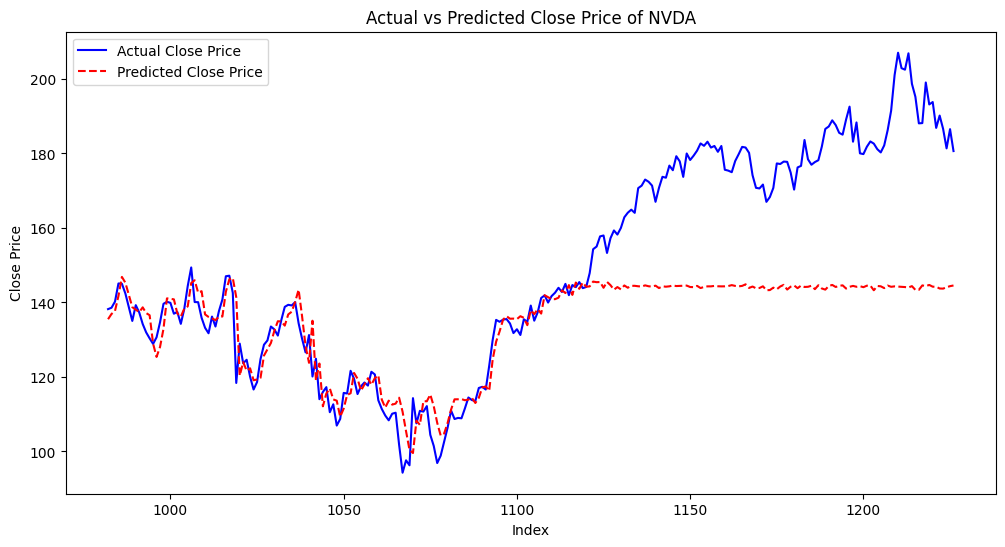

In [17]:
# Visualize the prediction
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title(f'Actual vs Predicted Close Price of {Stock_comp}')
plt.legend()
plt.show()

The first part of the production is really good, but around index 1100 the prediction goes flat, which is weird.

In [18]:
# Try another model: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [19]:
# evaluate the model_gb
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 522.4697986842796
Mean Absolute Error: 16.00770835342152


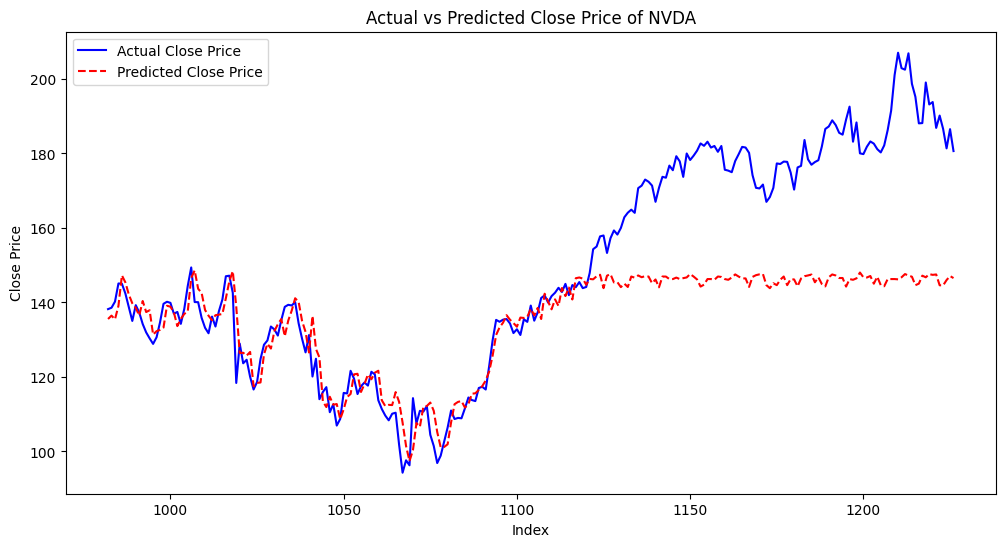

In [20]:
# Visualize the prediction
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title(f'Actual vs Predicted Close Price of {Stock_comp}')
plt.legend()
plt.show()

In [21]:
# try another model: Linear Regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# evaluate the model_gb
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 17.84031871354162
Mean Absolute Error: 3.068928091774842


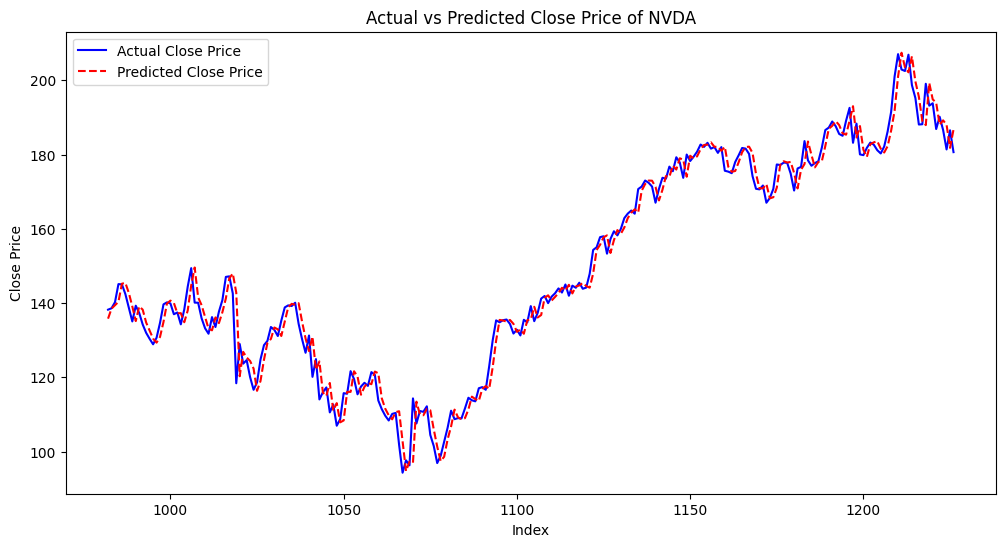

In [25]:
# Visualize the prediction
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title(f'Actual vs Predicted Close Price of {Stock_comp}')
plt.legend()
plt.show()

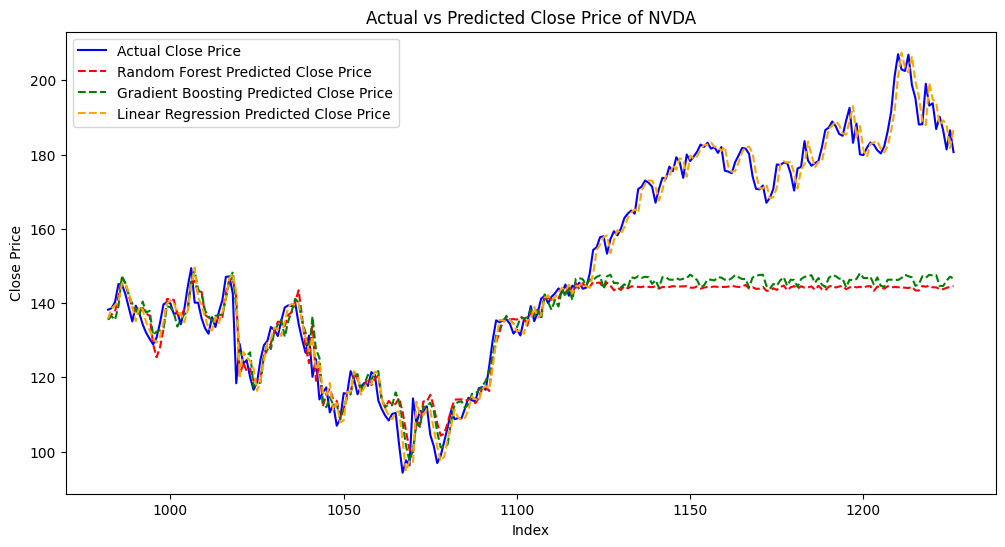

In [26]:
# all in one plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, model.predict(X_test), label='Random Forest Predicted Close Price', color='red', linestyle='--')
plt.plot(y_test.index, model_gb.predict(X_test), label='Gradient Boosting Predicted Close Price', color='green', linestyle='--')
plt.plot(y_test.index, model_lr.predict(X_test), label='Linear Regression Predicted Close Price', color='orange', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title(f'Actual vs Predicted Close Price of {Stock_comp}')
plt.legend()
plt.show()